In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

class Rolling_UNet(nn.Module):

  def __init__(self):
        super(Rolling_UNet, self).__init__()       

        self.nonlinearity = nn.ReLU() 

        # (out channels, in Channels, Kernel Size)

        # down 1 
                                                                                 #        OUT  IN
        weight_00 = torch.empty(64, 1, 3, 3); biases_00 = torch.empty(64)        # UNet : (64, 1, 3, 3)
        nn.init.kaiming_normal_(weight_00, mode='fan_in', nonlinearity='relu')
        self.weight_00 = nn.Parameter(weight_00, requires_grad = True)

        fan_in, _ = nn.init._calculate_fan_in_and_fan_out(self.weight_00)
        bound = 1 / math.sqrt(fan_in)
        nn.init.uniform_(biases_00, -bound, bound)        
        self.biases_00 = nn.Parameter(biases_00, requires_grad = True)
        

        self.bnormn_00 = nn.BatchNorm2d(64)
                                                                                 #        OUT  IN
        weight_10 = torch.empty(1, 64, 3, 3); biases_10 = torch.empty(64)        # UNet : (64, 64, 3, 3)
        nn.init.kaiming_normal_(weight_10, mode='fan_in', nonlinearity='relu')
        self.weight_10 = nn.Parameter(weight_10, requires_grad = True)

        fan_in, _ = nn.init._calculate_fan_in_and_fan_out(self.weight_10)
        bound = 1 / math.sqrt(fan_in)
        nn.init.uniform_(biases_10, -bound, bound)        
        self.biases_10 = nn.Parameter(biases_10, requires_grad = True)
        
        self.bnormn_10 = nn.BatchNorm2d(64)

                                                                                 #        OUT  IN
        weight_11 = torch.empty(1, 64, 3, 3); biases_11 = torch.empty(64)        # UNet : (64, 64, 3, 3)
        nn.init.kaiming_normal_(weight_11, mode='fan_in', nonlinearity='relu')
        self.weight_11 = nn.Parameter(weight_11, requires_grad = True)

        fan_in, _ = nn.init._calculate_fan_in_and_fan_out(self.weight_11)
        bound = 1 / math.sqrt(fan_in)
        nn.init.uniform_(biases_11, -bound, bound)        
        self.biases_11 = nn.Parameter(biases_11, requires_grad = True)
        
        self.bnormn_11 = nn.BatchNorm2d(64)

        self.down1  = nn.MaxPool2d(2,2)

        # down 2 
                                                                                #         OUT  IN
        weight_20 = torch.empty(2, 64, 3, 3); biases_20 = torch.empty(128)      # UNet : (128, 64, 3, 3)
        nn.init.kaiming_normal_(weight_20, mode='fan_in', nonlinearity='relu')
        self.weight_20 = nn.Parameter(weight_20, requires_grad = True)

        fan_in, _ = nn.init._calculate_fan_in_and_fan_out(self.weight_20)
        bound = 1 / math.sqrt(fan_in)
        nn.init.uniform_(biases_20, -bound, bound)  
        self.biases_20 = nn.Parameter(biases_20, requires_grad = True)

        self.bnormn_20 = nn.BatchNorm2d(128)
                                                                                #         OUT  IN
        weight_21 = torch.empty(1, 128, 3, 3); biases_21 = torch.empty(128)     # UNet : (128, 128, 3, 3)
        nn.init.kaiming_normal_(weight_21, mode='fan_in', nonlinearity='relu')
        self.weight_21 = nn.Parameter(weight_21, requires_grad = True)

        fan_in, _ = nn.init._calculate_fan_in_and_fan_out(self.weight_21)
        bound = 1 / math.sqrt(fan_in)
        nn.init.uniform_(biases_21, -bound, bound)  
        self.biases_21 = nn.Parameter(biases_21, requires_grad = True)

        self.bnormn_21 = nn.BatchNorm2d(128)

        self.down2  = nn.MaxPool2d(2,2)


        # down 3 
                                                                                #         OUT   IN
        weight_30 = torch.empty(2, 128, 3, 3); biases_30 = torch.empty(256)     # UNet : (256, 128, 3, 3)
        nn.init.kaiming_normal_(weight_30, mode='fan_in', nonlinearity='relu' )
        self.weight_30 = nn.Parameter(weight_30, requires_grad = True)

        fan_in, _ = nn.init._calculate_fan_in_and_fan_out(self.weight_30)
        bound = 1 / math.sqrt(fan_in)
        nn.init.uniform_(biases_30, -bound, bound) 
        self.biases_30 = nn.Parameter(biases_30, requires_grad = True)

        self.bnormn_30 = nn.BatchNorm2d(256)
                                                                                #        OUT  IN
        weight_31 = torch.empty(1, 256, 3, 3); biases_31= torch.empty(256)      # UNet :(256, 256, 3, 3)
        nn.init.kaiming_normal_(weight_31, mode='fan_in', nonlinearity='relu' )
        self.weight_31 = nn.Parameter(weight_31, requires_grad = True)

        fan_in, _ = nn.init._calculate_fan_in_and_fan_out(self.weight_31)
        bound = 1 / math.sqrt(fan_in)
        nn.init.uniform_(biases_31, -bound, bound) 
        self.biases_31 = nn.Parameter(biases_31, requires_grad = True)

        self.bnormn_31 = nn.BatchNorm2d(256)

        self.down3 = nn.MaxPool2d(2,2)


        # down 4 
                                                                                 #         OUT   IN
        weight_40 = torch.empty(2, 256, 3, 3); biases_40 = torch.empty(512)      # UNet : (512,  256, 3, 3)
        nn.init.kaiming_normal_(weight_40, mode='fan_in', nonlinearity='relu')
        self.weight_40 = nn.Parameter(weight_40, requires_grad = True)

        fan_in, _ = nn.init._calculate_fan_in_and_fan_out(self.weight_40)
        bound = 1 / math.sqrt(fan_in)
        nn.init.uniform_(biases_40, -bound, bound) 
        self.biases_40 = nn.Parameter(biases_40, requires_grad = True)

        self.bnormn_40 = nn.BatchNorm2d(512)
                                                                                 #          OUT   IN
        weight_41 = torch.empty(1, 512, 3, 3); biases_41= torch.empty(512)       # UNet :  (512, 512, 3, 3)
        nn.init.kaiming_normal_(weight_41, mode='fan_in', nonlinearity='relu' )
        self.weight_41 = nn.Parameter(weight_41, requires_grad = True)

        fan_in, _ = nn.init._calculate_fan_in_and_fan_out(self.weight_41)
        bound = 1 / math.sqrt(fan_in)
        nn.init.uniform_(biases_41, -bound, bound) 
        self.biases_41 = nn.Parameter(biases_41, requires_grad = True)

        self.bnormn_41 = nn.BatchNorm2d(512); 
        
        self.down4  = nn.MaxPool2d(2,2)


        # middle 
                                                                                 #          OUT  IN    
        weight_m0 = torch.empty(2, 512, 3, 3); biases_m0 = torch.empty(1024)     # UNet : (1024, 512, 3, 3)
        nn.init.kaiming_normal_(weight_m0, mode='fan_in', nonlinearity='relu')
        self.weight_m0 = nn.Parameter(weight_m0, requires_grad = True)

        fan_in, _ = nn.init._calculate_fan_in_and_fan_out(self.weight_m0)
        bound = 1 / math.sqrt(fan_in)
        nn.init.uniform_(biases_m0, -bound, bound) 
        self.biases_m0 = nn.Parameter(biases_m0, requires_grad = True)

        self.bnormn_m0 = nn.BatchNorm2d(1024)
                                                                                 #          OUT    IN
        weight_m1 = torch.empty(1, 1024, 3, 3); biases_m1= torch.empty(1024)     # UNet : (1024, 1024, 3, 3)
        nn.init.kaiming_normal_(weight_m1, mode='fan_in', nonlinearity='relu' )
        self.weight_m1 = nn.Parameter(weight_m1, requires_grad = True)

        fan_in, _ = nn.init._calculate_fan_in_and_fan_out(self.weight_m1)
        bound = 1 / math.sqrt(fan_in)
        nn.init.uniform_(biases_m1, -bound, bound) 
        self.biases_m1 = nn.Parameter(biases_m1, requires_grad = True)

        self.bnormn_m1 = nn.BatchNorm2d(1024)


        # up 1
                                                                                #          IN   OUT                   # Transpose ConV
        weight_u1 = torch.empty(1024, 1, 2, 2); biases_u1 = torch.empty(512)    # UNet : (1024, 512, 2, 2)
        nn.init.kaiming_normal_(weight_u1, mode='fan_in', nonlinearity='relu'  )
        self.weight_u1 = nn.Parameter(weight_u1, requires_grad = True)

        fan_in, _ = nn.init._calculate_fan_in_and_fan_out(self.weight_u1)
        bound = 1 / math.sqrt(fan_in)
        nn.init.uniform_(biases_u1, -bound, bound) 
        self.biases_u1 = nn.Parameter(biases_u1, requires_grad = True)
                                                                                #          OUT  IN
        weight_50 = torch.empty(1, 1024, 3, 3); biases_50 = torch.empty(512)    # UNet : (512, 1024, 3, 3)
        nn.init.kaiming_normal_(weight_50, mode='fan_in', nonlinearity='relu')
        self.weight_50 = nn.Parameter(weight_50, requires_grad = True)

        fan_in, _ = nn.init._calculate_fan_in_and_fan_out(self.weight_50)
        bound = 1 / math.sqrt(fan_in)
        nn.init.uniform_(biases_50, -bound, bound) 
        self.biases_50 = nn.Parameter(biases_50, requires_grad = True)

        self.bnormn_50 = nn.BatchNorm2d(512)
                                                                                #         OUT   IN
        weight_51 = torch.empty(1, 512, 3, 3); biases_51= torch.empty(512)      # UNet : (512, 512, 3, 3)
        nn.init.kaiming_normal_(weight_51, mode='fan_in', nonlinearity='relu' )
        self.weight_51 = nn.Parameter(weight_51, requires_grad = True)

        fan_in, _ = nn.init._calculate_fan_in_and_fan_out(self.weight_51)
        bound = 1 / math.sqrt(fan_in)
        nn.init.uniform_(biases_51, -bound, bound) 
        self.biases_51 = nn.Parameter(biases_51, requires_grad = True)

        self.bnormn_51 = nn.BatchNorm2d(512)


        # up 2
                                                                                #          IN   OUT                 # Transpose ConV
        weight_u2 = torch.empty(512, 1, 2, 2); biases_u2 = torch.empty(256)     #  UNet : (512, 256, 2, 2)
        nn.init.kaiming_normal_(weight_u2, mode='fan_in', nonlinearity='relu')
        self.weight_u2 = nn.Parameter(weight_u2, requires_grad = True)


        fan_in, _ = nn.init._calculate_fan_in_and_fan_out(self.weight_u2)
        bound = 1 / math.sqrt(fan_in)
        nn.init.uniform_(biases_u2, -bound, bound) 
        self.biases_u2 = nn.Parameter(biases_u2, requires_grad = True)
                                                                                #         OUT  IN
        weight_60 = torch.empty(1, 512, 3, 3); biases_60 = torch.empty(256)     # UNet : (256, 512, 3, 3)
        nn.init.kaiming_normal_(weight_60, mode='fan_in', nonlinearity='relu')
        self.weight_60 = nn.Parameter(weight_60, requires_grad = True)

        fan_in, _ = nn.init._calculate_fan_in_and_fan_out(self.weight_60)
        bound = 1 / math.sqrt(fan_in)
        nn.init.uniform_(biases_60, -bound, bound) 
        self.biases_60 = nn.Parameter(biases_60, requires_grad = True)

        self.bnormn_60 = nn.BatchNorm2d(256)
                                                                                #         OUT   IN
        weight_61 = torch.empty(1, 256, 3, 3); biases_61= torch.empty(256)      # UNet : (256, 256, 3, 3)
        nn.init.kaiming_normal_(weight_61, mode='fan_in', nonlinearity='relu' )
        self.weight_61 = nn.Parameter(weight_61, requires_grad = True)

        fan_in, _ = nn.init._calculate_fan_in_and_fan_out(self.weight_61)
        bound = 1 / math.sqrt(fan_in)
        nn.init.uniform_(biases_61, -bound, bound) 
        self.biases_61 = nn.Parameter(biases_61, requires_grad = True)

        self.bnormn_61 = nn.BatchNorm2d(256)


        # up 3
                                                                                #         IN   OUT               # Transpose ConV
        weight_u3 = torch.empty(256, 1, 2, 2); biases_u3 = torch.empty(128)     # UNet : (256, 128, 2, 2)
        nn.init.kaiming_normal_(weight_u3, mode='fan_in', nonlinearity='relu'  )
        self.weight_u3 = nn.Parameter(weight_u3, requires_grad = True)

        fan_in, _ = nn.init._calculate_fan_in_and_fan_out(self.weight_u3)
        bound = 1 / math.sqrt(fan_in)
        nn.init.uniform_(biases_u3, -bound, bound) 
        self.biases_u3 = nn.Parameter(biases_u3, requires_grad = True)
                                                                                #         OUT   IN
        weight_70 = torch.empty(1, 256, 3, 3); biases_70 = torch.empty(128)     # UNet : (128, 256, 3, 3)
        nn.init.kaiming_normal_(weight_70, mode='fan_in', nonlinearity='relu')
        self.weight_70 = nn.Parameter(weight_70, requires_grad = True)
        

        fan_in, _ = nn.init._calculate_fan_in_and_fan_out(self.weight_70)
        bound = 1 / math.sqrt(fan_in)
        nn.init.uniform_(biases_70, -bound, bound) 
        self.biases_70 = nn.Parameter(biases_70, requires_grad = True)

        self.bnormn_70 = nn.BatchNorm2d(128)
                                                                                #         OUT   IN
        weight_71 = torch.empty(1, 128, 3, 3); biases_71= torch.empty(128)      # UNet : (128, 128, 3, 3)
        nn.init.kaiming_normal_(weight_71, mode='fan_in', nonlinearity='relu' )
        self.weight_71 = nn.Parameter(weight_71, requires_grad = True)

        fan_in, _ = nn.init._calculate_fan_in_and_fan_out(self.weight_71)
        bound = 1 / math.sqrt(fan_in)
        nn.init.uniform_(biases_71, -bound, bound) 
        self.biases_71 = nn.Parameter(biases_71, requires_grad = True)

        self.bnormn_71 = nn.BatchNorm2d(128)


        # up 4
                                                                                #         IN   OUT                  # Transposed ConV
        weight_u4 = torch.empty(128, 1, 2, 2); biases_u4 = torch.empty(64)      # UNet : (128, 64, 2, 2)
        nn.init.kaiming_normal_(weight_u4, mode='fan_in', nonlinearity='relu'  )
        self.weight_u4 = nn.Parameter(weight_u4, requires_grad = True)

        fan_in, _ = nn.init._calculate_fan_in_and_fan_out(self.weight_u4)
        bound = 1 / math.sqrt(fan_in)
        nn.init.uniform_(biases_u4, -bound, bound) 
        self.biases_u4 = nn.Parameter(biases_u4, requires_grad = True)
                                                                                #        OUT  IN
        weight_80 = torch.empty(1, 128, 3, 3); biases_80 = torch.empty(64)      # UNet : (64, 32, 3, 3)
        nn.init.kaiming_normal_(weight_80, mode='fan_in', nonlinearity='relu')
        self.weight_80 = nn.Parameter(weight_80, requires_grad = True)

        fan_in, _ = nn.init._calculate_fan_in_and_fan_out(self.weight_80)
        bound = 1 / math.sqrt(fan_in)
        nn.init.uniform_(biases_80, -bound, bound) 
        self.biases_80 = nn.Parameter(biases_80, requires_grad = True)

        self.bnormn_80 = nn.BatchNorm2d(64)
                                                                                #        OUT  IN
        weight_81 = torch.empty(1, 64, 3, 3); biases_81= torch.empty(64)        # UNet : (64, 64, 3, 3)
        nn.init.kaiming_normal_(weight_81, mode='fan_in', nonlinearity='relu' )
        self.weight_81 = nn.Parameter(weight_81, requires_grad = True)

        fan_in, _ = nn.init._calculate_fan_in_and_fan_out(self.weight_81)
        bound = 1 / math.sqrt(fan_in)
        nn.init.uniform_(biases_81, -bound, bound) 
        self.biases_81 = nn.Parameter(biases_81, requires_grad = True)

        self.bnormn_81 = nn.BatchNorm2d(64)

         # Final
        self.out = nn.Conv2d(64,3,1)

  
  def _half_roll(self, inp, w, b, s, p, bnorm, dconv):
    if dconv:
      # w has one out channel.
      rolls = int(w.size()[0]/2)  
      for i in range(1,rolls+1):
        if i==1:
          filter = w
        else:
          w = torch.roll(w, shifts = 1,  dims=0)
          filter = torch.cat((filter, w), dim=1)
      out = F.conv_transpose2d(inp, filter, b, s, p)
      return out
    else:
      # w has one out channel.
      rolls = int(w.size()[1]/2)      
      for i in range(1,rolls+1):       
        if i==1:
          filter = w
        else:
          w = torch.roll(w, shifts = 1,  dims=1)
          filter = torch.cat((filter, w), dim=0)        
      out = self.nonlinearity(bnorm(F.conv2d(inp, filter, b, s, p)))
      return out


  def _single_roll(self, inp, w, b, s, p, bnorm):
    # w has one out channel.
    rolls = w.size()[1]    
    for i in range(1,rolls+1):
      if i==1:
        filter = w
      else:
        w = torch.roll(w, shifts = 1,  dims=1)
        filter = torch.cat((filter, w), dim=0)
    out = self.nonlinearity(bnorm(F.conv2d(inp, filter, b, s, p)))
    return out
    
  
  def _double_roll(self, inp, w, b, s, p, bnorm):
    # w has two out channels.
    rolls = w.size()[1]    
    for i in range(1,rolls+1):
      if i==1:
        filter = w
      else:
        w = torch.roll(w, shifts = 1,  dims=1)
        filter = torch.cat((filter, w), dim=0)
    out = self.nonlinearity(bnorm(F.conv2d(inp, filter, b, s, p)))
    return out


  def forward(self, x):

    #print('inp : ', x.shape)
    
    # down 1 -------------------------------------------------------------------------------

    # initial 
    x00 = self.nonlinearity(self.bnormn_00(F.conv2d(x, self.weight_00, self.biases_00, 1, 1)))
    #print('x00 : ', x00.shape)

    # single roll
    x10 = self._single_roll( x00,  self.weight_10,  self.biases_10,  1,  1,  self.bnormn_10 )
    #print('x10 : ', x10.shape)
    x11 = self._single_roll( x10,  self.weight_11,  self.biases_11,  1,  1,  self.bnormn_11 )
    #print('x11 : ', x11.shape)
    xd1 = self.down1(x11)
    #print('xd1 : ', xd1.shape)

    # down 2 --------------------------------------------------------------------------------

    # double roll
    x20 = self._double_roll( xd1,  self.weight_20,  self.biases_20,  1,  1,  self.bnormn_20)
    #print('x20 : ', x20.shape)

    # single roll
    x21 = self._single_roll( x20,  self.weight_21,  self.biases_21,  1,  1,  self.bnormn_21 )
    #print('x21 : ', x21.shape)
    xd2 = self.down2(x21)
    #print('xd2 : ', xd2.shape)

    # down 3 ---------------------------------------------------------------------------------

    # double roll
    x30 = self._double_roll( xd2,  self.weight_30,  self.biases_30,  1,  1,  self.bnormn_30)
    #print('x30 : ', x30.shape)

    # single roll
    x31 = self._single_roll( x30,  self.weight_31,  self.biases_31,  1,  1,  self.bnormn_31 )
    #print('x31 : ', x31.shape)
    xd3 = self.down3(x31)
    #print('xd3 : ', xd3.shape)

    # down 4 ---------------------------------------------------------------------------------

    # double roll
    x40 = self._double_roll( xd3,  self.weight_40,  self.biases_40,  1,  1,  self.bnormn_40)
    #print('x40 : ', x40.shape)

    # single roll
    x41 = self._single_roll( x40,  self.weight_41,  self.biases_41,  1,  1,  self.bnormn_41 )
    #print('x41 : ', x41.shape)
    xd4 = self.down3(x41)
    #print('xd4 : ', xd4.shape)

    # middle ---------------------------------------------------------------------------------

    # double roll
    xm0 = self._double_roll( xd4,  self.weight_m0,  self.biases_m0,  1,  1,  self.bnormn_m0)
    #print('xm0 : ', xm0.shape)

    # single roll
    xm1 = self._single_roll( xm0,  self.weight_m1,  self.biases_m1,  1,  1,  self.bnormn_m1 )
    #print('xm1 : ', xm1.shape)


    # up 1 -------------------------------------------------------------------------------------

    xu1 = self._half_roll( xm1,  self.weight_u1,  self.biases_u1,  2,  0,   None,   True)
    #print('xu1 : ', xu1.shape)
    xc1  = torch.cat((xu1,x41),dim = 1)
    #print('xc1 : ', xc1.shape)

    # half roll
    x50 = self._half_roll( xc1,  self.weight_50,  self.biases_50, 1, 1, self.bnormn_50, False)
    #print('x50 : ', x50.shape)

    # single roll
    x51 = self._single_roll( x50,  self.weight_51,  self.biases_51,  1,  1,  self.bnormn_51 )
    #print('x51 : ', x51.shape)


    # up 2 -------------------------------------------------------------------------------------

    xu2 = self._half_roll( x51,  self.weight_u2,  self.biases_u2,  2,  0,   None,   True)
    #print('xu2 : ', xu2.shape)
    xc2  = torch.cat((xu2,x31),dim = 1)
    #print('xc2 : ', xc2.shape)

    # half roll
    x60 = self._half_roll( xc2,  self.weight_60,  self.biases_60, 1, 1, self.bnormn_60, False)
    #print('x60 : ', x60.shape)

    # single roll
    x61 = self._single_roll( x60,  self.weight_61,  self.biases_61,  1,  1,  self.bnormn_61 )
    #print('x61 : ', x61.shape)

    # up 3 -------------------------------------------------------------------------------------

    xu3 = self._half_roll( x61,  self.weight_u3,  self.biases_u3,  2,  0,   None,   True)
    #print('xu3 : ', xu3.shape)
    xc3  = torch.cat((xu3,x21),dim = 1)
    #print('xc3 : ', xc3.shape)

    # half roll
    x70 = self._half_roll( xc3,  self.weight_70,  self.biases_70, 1, 1, self.bnormn_70, False)
    #print('x70 : ', x70.shape)

    # single roll
    x71 = self._single_roll( x70,  self.weight_71,  self.biases_71,  1,  1,  self.bnormn_71 )
    #print('x71 : ', x70.shape)

    # up 4 -------------------------------------------------------------------------------------

    xu4 = self._half_roll( x71,  self.weight_u4,  self.biases_u4,  2,  0,   None,   True)
    #print('xu4 : ', xu4.shape)
    xc4  = torch.cat((xu4,x11),dim = 1)
    #print('xc4 : ', xc4.shape)

    # half roll
    x80 = self._half_roll( xc4,  self.weight_80,  self.biases_80, 1, 1, self.bnormn_80, False)
    #print('x80 : ', x80.shape)

    # single roll
    x81 = self._single_roll( x80,  self.weight_81,  self.biases_81,  1,  1,  self.bnormn_81 )
    #print('x81 : ', x81.shape)

    # Final -----------------------------------------------------------------------------------

    out = self.out(x81)
    #print('out : ', out.shape)

    x = F.softmax(out,dim=1)

    x = torch.argmax(x,dim=1).squeeze().float()

    return x 

  def getnumberofparams(self,model):
    pp=0
    for p in list(model.parameters()):
        nn=1
        for s in (p.size()):
            nn = nn*s
        pp += nn
    return pp

        
        
if __name__ == "__main__":
  net = Rolling_UNet()
  net  = net.cuda()
  x = torch.rand( 1, 1, 512, 512).cuda()
  with torch.no_grad():  
    print("Input Shape  : ", x.shape)  
    y = net(x)    
    print("Output Shape : ", y.shape)
    print("Model Parameters : ", net.getnumberofparams(net))

Input Shape  :  torch.Size([1, 1, 512, 512])
Output Shape :  torch.Size([512, 512])
Model Parameters :  88899


In [24]:
import scipy.io as io
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import numpy as np
from google.colab import files

import warnings
warnings.warn("deprecated", DeprecationWarning)
warnings.simplefilter("ignore")

net = Rolling_UNet().cuda()
data = io.loadmat('segment.mat')
net.load_state_dict(torch.load('segment.pth',map_location=torch.device('cpu')))
net.eval()

inp1 = data['im1']
inp1 = np.reshape(inp1,(512,512,1))
inp1 = transforms.ToTensor()(inp1).cuda().unsqueeze(dim=0)
out1 = net(inp1).detach().cpu().numpy()

inp2 = data['im2']
inp2 = np.reshape(inp2,(512,512,1))
inp2 = transforms.ToTensor()(inp2).cuda().unsqueeze(dim=0)
out2 = net(inp2).detach().cpu().numpy()

inp3 = data['im3']
inp3 = np.reshape(inp3,(512,512,1))
inp3 = transforms.ToTensor()(inp3).cuda().unsqueeze(dim=0)
out3 = net(inp3).detach().cpu().numpy()

inp4 = data['im4']
inp4 = np.reshape(inp4,(512,512,1))
inp4 = transforms.ToTensor()(inp4).cuda().unsqueeze(dim=0)
out4 = net(inp4).detach().cpu().numpy()

# Sample Input CT Slices

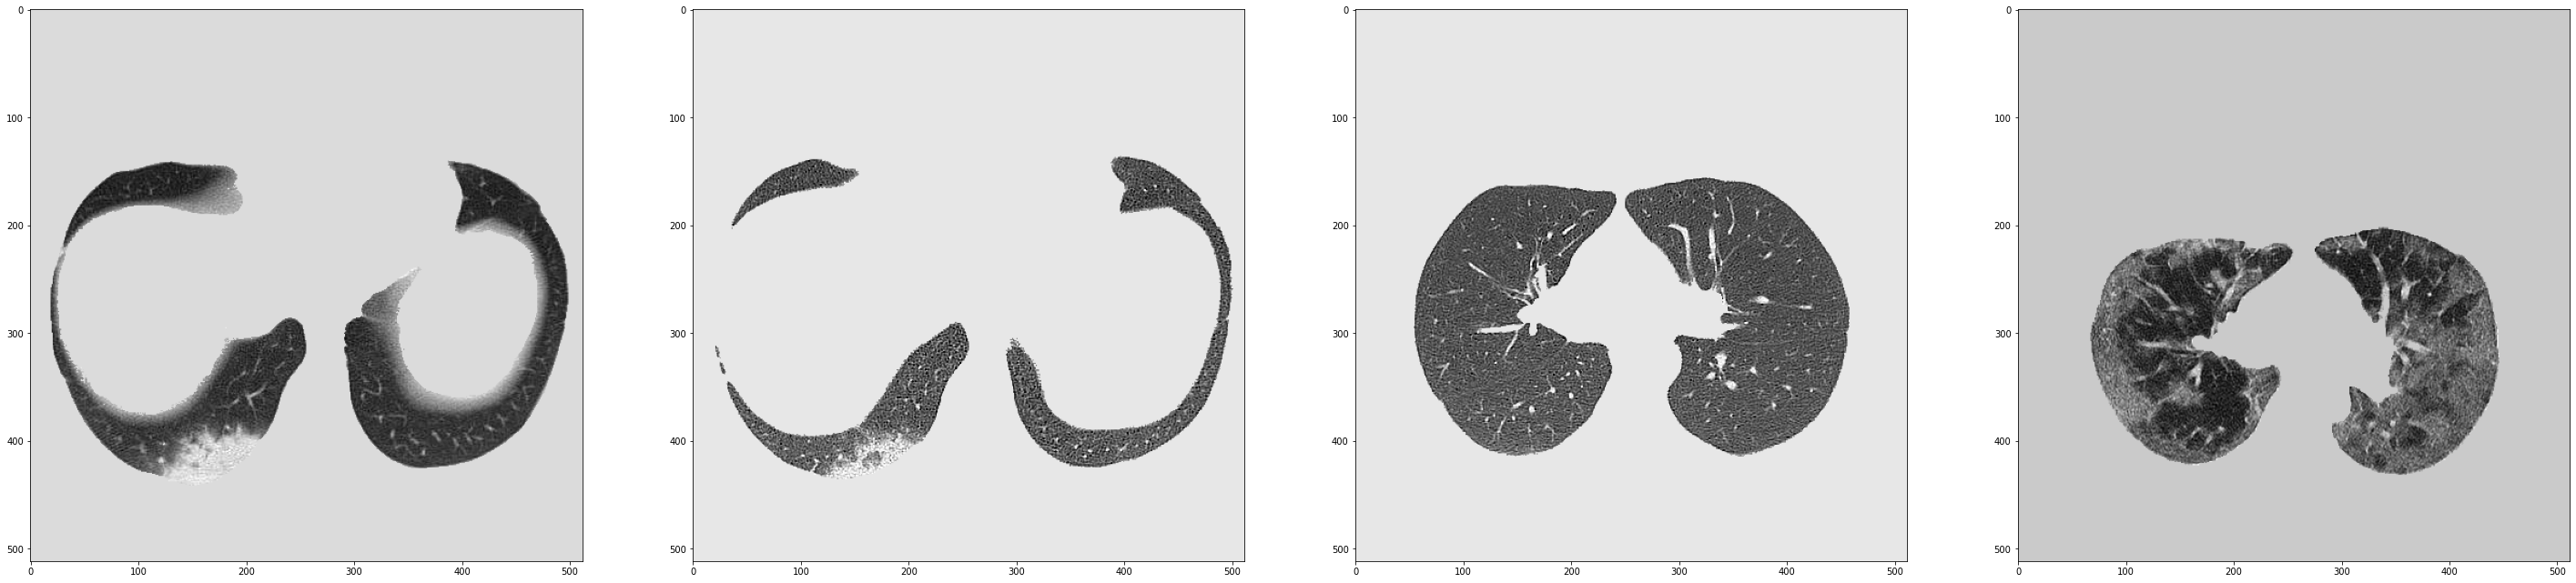

In [25]:
fig, axs = plt.subplots(1, 4, figsize=(50, 50))
axs[0].imshow(data['im1'],cmap='gray')
axs[1].imshow(data['im2'],cmap='gray')
axs[2].imshow(data['im3'],cmap='gray')
axs[3].imshow(data['im4'],cmap='gray')

# Rolling UNet Prediction

**Green** : Infected Tissue

**Yellow**: Healthy Tissue

**Purple**:Non-Lung Region

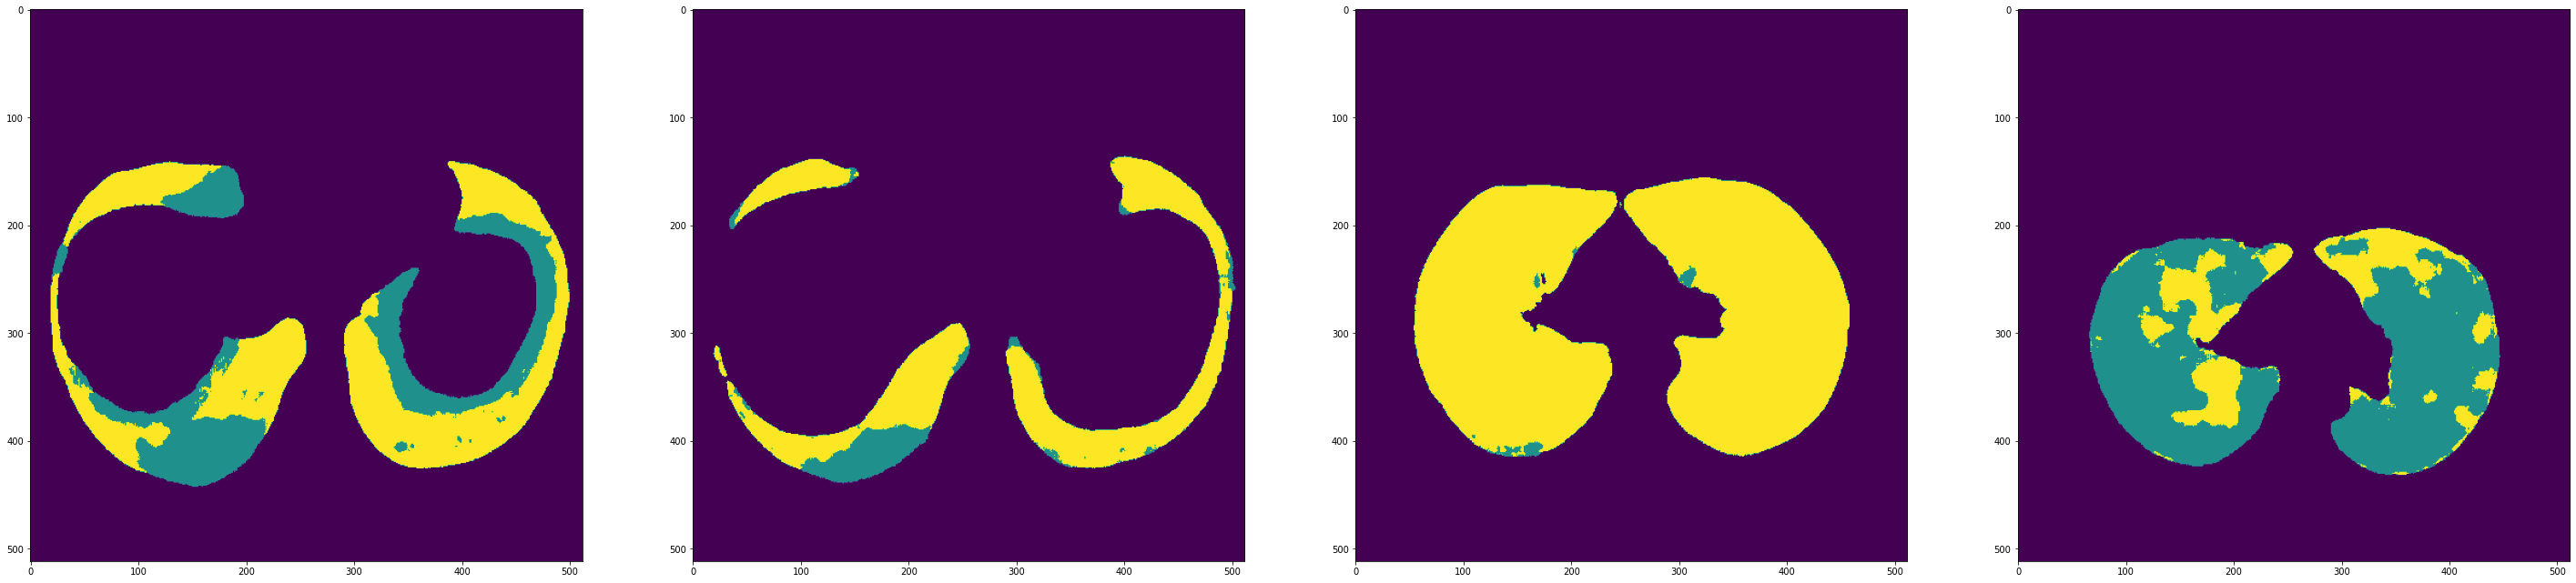

In [26]:
fig, axs = plt.subplots(1, 4, figsize=(50, 50))
axs[0].imshow(out1)
axs[1].imshow(out2)
axs[2].imshow(out3)
axs[3].imshow(out4)